In [343]:
# Data Manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv('merged-population-asia.csv')

In [345]:
df = df[df['Country Name'] == 'India']
df = df.drop(['Unnamed: 0'], axis=1)
#df.drop(df[df['Year'] <= 1998].index, inplace = True)
df.head

<bound method NDFrame.head of    Country Name  Year  Hydropower (terawatt-hours)  Solar (terawatt-hours)  \
28        India  1990                    66.397066                0.000000   
29        India  1991                    73.918884                0.000000   
30        India  1992                    70.060748                0.000000   
31        India  1993                    70.732497                0.000000   
32        India  1994                    80.212110                0.000000   
33        India  1995                    75.920873                0.001010   
34        India  1996                    69.057544                0.006061   
35        India  1997                    70.211008                0.006061   
36        India  1998                    83.632726                0.006061   
37        India  1999                    82.249453                0.006061   
38        India  2000                    76.990367                0.007071   
39        India  2001             

In [346]:
# Finding the correlation between consumption and population
from scipy.stats import pearsonr

corr, _ = pearsonr(df['Hydropower (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Hydropower: %.3f' % corr)

corr, _ = pearsonr(df['Solar (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Solar Power: %.3f' % corr)

corr, _ = pearsonr(df['Wind (terawatt-hours)'], df['Population'])
print('Pearsons correlation for Wind: %.3f' % corr)

corr, _ = pearsonr(df['Other renewables (terawatt-hours)'], df['Population'])
print('Pearsons correlation for other renewables: %.3f' % corr)

# With the high correlation for Hydropower and population (0.899) in India, we
# can support our claim that an increase in population leads to an increase in
# need for hydropower.


Pearsons correlation for Hydropower: 0.899
Pearsons correlation for Solar Power: 0.573
Pearsons correlation for Wind: 0.877
Pearsons correlation for other renewables: 0.898


# Hydropower

In [347]:
# Use MinMax Scaling on Year and Hydropower
scaler=MinMaxScaler()
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Hydropower (scaled)']=scaler.fit_transform(df[['Hydropower (terawatt-hours)']])

In [348]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Hydropower (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Hydropower Energy Consumption in India", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()



In [349]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Hydropower (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='linear', C=500, epsilon=10) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)




# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [350]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Hydropower (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Hydropower Energy Consumption in India (epsilon=10, C=500)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [351]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([ 84.90815549, 134.87471085, 120.17866545,  93.72578316,
        73.15131932,  90.78657394, 131.93550163, 123.1178742 ,
        76.09052878])

In [352]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)


print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print('Mean Absolute Error is: ', meanAbErr)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 81.11
Mean Absolute Error is:  9.234811594871186
Mean Squared Error is:  142.34131582627762
Root Mean Squared Error is:  11.930687986293062


In [353]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,84.908155,82.249453
1,134.874711,128.381614
2,120.178665,131.704598
3,93.725783,68.544894
4,73.151319,75.920873
5,90.786574,72.022962
6,131.935502,133.282537
7,123.117874,115.776375
8,76.090529,69.057544


In [354]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 85.46796314, 131.84152127, 118.20223947,  93.65153222,
        74.5565377 ,  90.92367586, 129.11366491, 120.93009583,
        77.28439406])

In [355]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)


print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print('Mean Absolute Error is: ', meanAbErr)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 81.29
Mean Absolute Error is:  9.233544960612205
Mean Squared Error is:  145.07850080842448
Root Mean Squared Error is:  12.044853706393635


In [356]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,85.467963,82.249453
1,131.841521,128.381614
2,118.202239,131.704598
3,93.651532,68.544894
4,74.556538,75.920873
5,90.923676,72.022962
6,129.113665,133.282537
7,120.930096,115.776375
8,77.284394,69.057544


In [357]:
# ------- Support Vector regression using entire dataset as training set -------
model2 = SVR(kernel='linear', C=500, epsilon=10) # set kernel and hyperparameters
svr = model2.fit(X, y)


In [358]:
#predicting y values for future years using updated SVR model
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([140.99798523, 143.99840901, 146.99883173, 149.99925457,
       152.99967824, 156.00010191, 159.00052474, 162.00094746,
       165.00137125, 168.00179396, 171.00221775, 174.00264047,
       177.0030633 , 180.00348697, 183.00391076, 186.00433348,
       189.00475631, 192.00517998, 195.00560365, 198.00602649,
       201.0064492 , 204.00687299, 207.00729571, 210.0077195 ,
       213.00814221, 216.00856505, 219.00898872, 222.00941251,
       225.00983523, 228.01025794, 231.01068173, 234.01110445,
       237.01152824])

In [359]:
net_consumption = y_pred
net_consumption

array([140.99798523, 143.99840901, 146.99883173, 149.99925457,
       152.99967824, 156.00010191, 159.00052474, 162.00094746,
       165.00137125, 168.00179396, 171.00221775, 174.00264047,
       177.0030633 , 180.00348697, 183.00391076, 186.00433348,
       189.00475631, 192.00517998, 195.00560365, 198.00602649,
       201.0064492 , 204.00687299, 207.00729571, 210.0077195 ,
       213.00814221, 216.00856505, 219.00898872, 222.00941251,
       225.00983523, 228.01025794, 231.01068173, 234.01110445,
       237.01152824])

In [360]:
# Finding the Rate of Increase for Hydropower Consumption
print ("Rate of Increase:", (y_pred[2] - 108.7440975)/10)

Rate of Increase: 3.8254734230768874


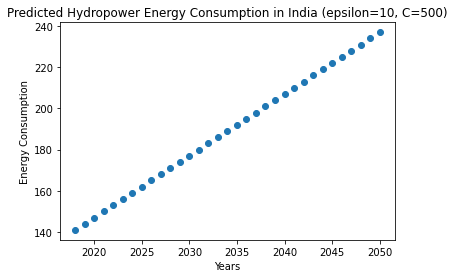

In [361]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Hydropower Energy Consumption in India (epsilon=10, C=500)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Solar

In [362]:
# Use MinMax Scaling on Year and Solar
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Solar (terawatt-hours)']])

In [363]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Solar (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Solar Energy Consumption in India", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()



In [364]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Solar (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=75, epsilon=2) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [365]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Solar (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+2, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-2, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Solar Energy Consumption in India (epsilon=2, C=75)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [366]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([ 1.83647717, 15.36047202, -1.05222859,  2.15752852,  1.37441746,
        2.13322516, 11.0205261 ,  0.69139803,  1.42646881])

In [367]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 82.10
Mean Squared Error is:  6.242495542027061
Root Mean Squared Error is:  2.4984986575996118


In [368]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.836477,0.006061
1,15.360472,11.555980
2,-1.052229,0.827000
3,2.157529,0.013131
4,1.374417,0.001010
5,2.133225,0.011111
6,11.020526,6.566380
7,0.691398,2.099000
8,1.426469,0.006061


In [369]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 0.4010226 ,  5.89777778,  4.28108508,  1.37103822, -0.89233156,
        1.04769968,  5.57443924,  4.60442362, -0.56899302])

In [370]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 35.80
Mean Squared Error is:  6.156690896001197
Root Mean Squared Error is:  2.481268001647786


In [371]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,0.401023,0.006061
1,5.897778,11.555980
2,4.281085,0.827000
3,1.371038,0.013131
4,-0.892332,0.001010
5,1.047700,0.011111
6,5.574439,6.566380
7,4.604424,2.099000
8,-0.568993,0.006061


In [372]:
model2 = SVR(kernel='rbf', C=75, epsilon=2) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([19.2412666 , 21.80375558, 23.47913244, 24.1828413 , 23.94927274,
       22.9139492 , 21.2808477 , 19.28335897, 17.1474208 , 15.0633269 ,
       13.16952803, 11.54848052, 10.23211658,  9.21323871,  8.45906133,
        7.92390044,  7.55918631,  7.32013111,  7.1692574 ,  7.07748817,
        7.02365177,  6.99317123,  6.97650772,  6.96770731,  6.96321573,
        6.96099958,  6.95994219,  6.9594542 ,  6.95923632,  6.95914219,
        6.95910282,  6.95908689,  6.95908064])

In [373]:
net_consumption += y_pred
net_consumption

array([160.23925183, 165.80216459, 170.47796417, 174.18209586,
       176.94895098, 178.91405111, 180.28137244, 181.28430643,
       182.14879205, 183.06512087, 184.17174578, 185.55112098,
       187.23517988, 189.21672568, 191.46297209, 193.92823392,
       196.56394262, 199.3253111 , 202.17486105, 205.08351465,
       208.03010098, 211.00004423, 213.98380343, 216.97542681,
       219.97135795, 222.96956463, 225.96893091, 228.96886671,
       231.96907155, 234.96940013, 237.96978455, 240.97019133,
       243.97060888])

In [374]:
# Finding the Rate of Increase for Solarpower Consumption
print ("Rate of Increase:", (y_pred[2] - 0.113)/10)

Rate of Increase: 2.3366132440725944


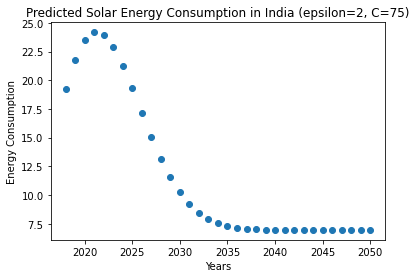

In [375]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Solar Energy Consumption in India (epsilon=2, C=75)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Wind

In [376]:
# Use MinMax Scaling on Year and Solar
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Wind (terawatt-hours)']])

In [377]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Wind (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Wind Energy Consumption in India", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [378]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Wind (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=75, epsilon=5) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [379]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Wind (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+5, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-5, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Wind Energy Consumption in India (epsilon=5, C=75)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [380]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([ 6.28638296, 45.39410634, 25.68339348,  7.07742406,  5.19697693,
        6.72757089, 42.26141856, 29.9056747 ,  5.52983251])

In [381]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 91.38
Mean Squared Error is:  24.12781296914256
Root Mean Squared Error is:  4.912007020469592


In [382]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,6.286383,1.44600
1,45.394106,43.45283
2,25.683393,23.95230
3,7.077424,2.08500
4,5.196977,0.49647
5,6.727571,2.08500
6,42.261419,32.74138
7,29.905675,27.43260
8,5.529833,0.87838


In [383]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 5.31628354, 30.6198621 , 23.17763311,  9.78162093, -0.63749966,
        8.29317513, 29.1314163 , 24.66607891,  0.85094614])

In [384]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 79.16
Mean Squared Error is:  33.3350886011738
Root Mean Squared Error is:  5.773654700549194


In [385]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,5.316284,1.44600
1,30.619862,43.45283
2,23.177633,23.95230
3,9.781621,2.08500
4,-0.637500,0.49647
5,8.293175,2.08500
6,29.131416,32.74138
7,24.666079,27.43260
8,0.850946,0.87838


In [386]:
model2 = SVR(kernel='rbf', C=75, epsilon=5) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([48.20389777, 49.54667109, 49.61410871, 48.47886289, 46.32903318,
       43.43323603, 40.0966743 , 36.61750687, 33.25141848, 30.18925388,
       27.54897759, 25.38007985, 23.67655535, 22.39394535, 21.46644991,
       20.82133007, 20.3892302 , 20.11026704, 19.93654383, 19.83212244,
       19.77150887, 19.73751568, 19.71909012, 19.7094341 , 19.70454027,
       19.70214101, 19.7010029 , 19.70048045, 19.70024831, 19.70014846,
       19.70010688, 19.70009011, 19.70008356])

In [387]:
net_consumption += y_pred
net_consumption

array([208.44314959, 215.34883569, 220.09207288, 222.66095875,
       223.27798416, 222.34728714, 220.37804674, 217.9018133 ,
       215.40021053, 213.25437475, 211.72072337, 210.93120083,
       210.91173523, 211.61067103, 212.92942201, 214.74956399,
       216.95317282, 219.43557814, 222.11140488, 224.91563709,
       227.80160985, 230.73755991, 233.70289355, 236.68486091,
       239.67589822, 242.67170563, 245.66993381, 248.66934716,
       251.66931986, 254.66954859, 257.66989143, 260.67028145,
       263.67069244])

In [388]:
# Finding the Rate of Increase for Wind energy Consumption
print ("Rate of Increase:", (y_pred[2] - 19.4564)/10)

Rate of Increase: 3.015770871225016


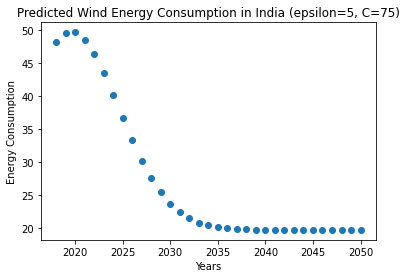

In [389]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Wind Energy Consumption in India (epsilon=5, C=75)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Other Renewables

In [390]:
# Use MinMax Scaling on Year and Other
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Solar (scaled)']=scaler.fit_transform(df[['Other renewables (terawatt-hours)']])

In [391]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Other renewables (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Other renewable Energy Consumption in India", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [392]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Other renewables (terawatt-hours)'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=50, epsilon=2) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [393]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Other renewables (terawatt-hours)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+2, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-2, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Other Energy Consumption in India (epsilon=2, C=50)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [394]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([ 3.27177995, 23.057446  , 18.1195082 ,  3.79297381,  2.50840713,
        3.53049957, 23.14993419, 20.08015899,  2.76328877])

In [395]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 96.26
Mean Squared Error is:  2.9325484400543815
Root Mean Squared Error is:  1.7124685223543181


In [396]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,3.271780,1.686079
1,23.057446,24.816846
2,18.119508,17.137000
3,3.792974,2.139901
4,2.508407,0.563795
5,3.530500,2.069150
6,23.149934,25.818000
7,20.080159,19.936000
8,2.763289,0.756149


In [397]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([ 3.70898426, 18.62983225, 14.24134755,  6.34207508,  0.19819649,
        5.46437814, 17.75213531, 15.11904449,  1.07589344])

In [398]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 81.09
Mean Squared Error is:  18.71545135707739
Root Mean Squared Error is:  4.326135845888036


In [399]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,3.708984,1.686079
1,18.629832,24.816846
2,14.241348,17.137000
3,6.342075,2.139901
4,0.198196,0.563795
5,5.464378,2.069150
6,17.752135,25.818000
7,15.119044,19.936000
8,1.075893,0.756149


In [400]:
model2 = SVR(kernel='rbf', C=50, epsilon=2) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([22.79798409, 21.62026551, 20.20733043, 18.68213227, 17.15635969,
       15.72040207, 14.43792218, 13.34501197, 12.4530946 , 11.75425595,
       11.2275799 , 10.84526255, 10.577668  , 10.39692467, 10.27903796,
       10.20475042, 10.15950183, 10.13285234, 10.11767137, 10.10930479,
       10.1048428 , 10.10253964, 10.10138883, 10.10083212, 10.10057135,
       10.10045307, 10.10040111, 10.100379  , 10.10036989, 10.10036625,
       10.10036485, 10.10036432, 10.10036413])

In [401]:
net_consumption += y_pred
net_consumption

array([231.24113368, 236.96910119, 240.29940332, 241.34309102,
       240.43434385, 238.06768921, 234.81596892, 231.24682527,
       227.85330513, 225.0086307 , 222.94830327, 221.77646338,
       221.48940322, 222.00759569, 223.20845996, 224.95431441,
       227.11267466, 229.56843048, 232.22907626, 235.02494189,
       237.90645265, 240.84009955, 243.80428238, 246.78569303,
       249.77646958, 252.77215871, 255.77033492, 258.76972616,
       261.76968975, 264.76991484, 267.77025628, 270.77064577,
       273.77105657])

In [402]:
# Finding the Rate of Increase for other renewables Consumption
print ("Rate of Increase:", (y_pred[2] - 14.295)/10)

Rate of Increase: 0.5912330434075956


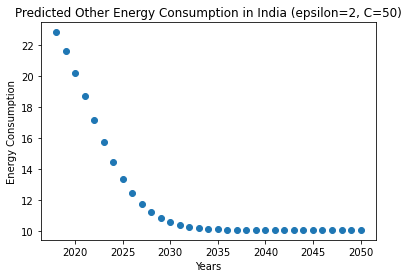

In [403]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Other Energy Consumption in India (epsilon=2, C=50)')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

# Population

In [406]:
# Use MinMax Scaling on Year and Population
df['Year (scaled)']=scaler.fit_transform(df[['Year']])
df['Population (scaled)']=scaler.fit_transform(df[['Population']])

In [407]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Population'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Population in India", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()


In [408]:
# Note, we need X to be a 2D array, hence reshape
X=df['Year'].values.reshape(-1,1)
y=df['Population'].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=100)


# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X_train, y_train)

# ------- Support Vector regression -------
model2 = SVR(kernel='linear', C=1000000000, epsilon=20000000) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [409]:
# Create a scatter plot
fig = px.scatter(df, x=df['Year'], y=df['Population'], 
                 opacity=0.8, color_discrete_sequence=['black'])
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+20000000, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-20000000, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Population in India (epsilon=20000000, C=1000000000)", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [410]:
#5 Predicting a new result
y_pred = svr.predict(X_test)
y_pred

array([1.03772932e+09, 1.31058218e+09, 1.23033134e+09, 1.08587982e+09,
       9.73528641e+08, 1.06982965e+09, 1.29453201e+09, 1.24638151e+09,
       9.89578810e+08])

In [411]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 99.00
Mean Squared Error is:  159904912328239.94
Root Mean Squared Error is:  12645351.411812957


In [412]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.037729e+09,1038058156
1,1.310582e+09,1324509589
2,1.230331e+09,1250288729
3,1.085880e+09,1093317189
4,9.735286e+08,963922588
5,1.069830e+09,1075000085
6,1.294532e+09,1310152403
7,1.246382e+09,1265782790
8,9.895788e+08,982365243


In [413]:
#5 Predicting a new result
y_pred = lr.predict(X_test)
y_pred

array([1.03644620e+09, 1.33675937e+09, 1.24843197e+09, 1.08944264e+09,
       9.65784277e+08, 1.07177716e+09, 1.31909389e+09, 1.26609745e+09,
       9.83449757e+08])

In [414]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R squared: 99.86
Mean Squared Error is:  29577098229471.31
Root Mean Squared Error is:  5438483.081657174


In [415]:
data = {'Predicted':y_pred, 'Actual':y_test}

comparison = pd.DataFrame(data)
comparison

,Predicted,Actual
0,1.036446e+09,1038058156
1,1.336759e+09,1324509589
2,1.248432e+09,1250288729
3,1.089443e+09,1093317189
4,9.657843e+08,963922588
5,1.071777e+09,1075000085
6,1.319094e+09,1310152403
7,1.266097e+09,1265782790
8,9.834498e+08,982365243


In [416]:
model2 = SVR(kernel='linear', C=1000000000, epsilon=20000000) # set kernel and hyperparameters
svr = model2.fit(X, y)
x_future = [[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]
y_pred = svr.predict(x_future)
y_pred

array([1.34268252e+09, 1.35873269e+09, 1.37478286e+09, 1.39083302e+09,
       1.40688319e+09, 1.42293336e+09, 1.43898353e+09, 1.45503370e+09,
       1.47108387e+09, 1.48713404e+09, 1.50318420e+09, 1.51923437e+09,
       1.53528454e+09, 1.55133471e+09, 1.56738488e+09, 1.58343505e+09,
       1.59948522e+09, 1.61553539e+09, 1.63158555e+09, 1.64763572e+09,
       1.66368589e+09, 1.67973606e+09, 1.69578623e+09, 1.71183640e+09,
       1.72788657e+09, 1.74393673e+09, 1.75998690e+09, 1.77603707e+09,
       1.79208724e+09, 1.80813741e+09, 1.82418758e+09, 1.84023775e+09,
       1.85628791e+09])

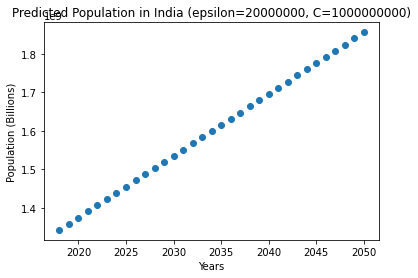

In [417]:
fig, ax = plt.subplots()
ax.scatter(years,y_pred)
ax.set_title('Predicted Population in India (epsilon=20000000, C=1000000000)')
ax.set_xlabel('Years')
ax.set_ylabel('Population (Billions)')


plt.show()

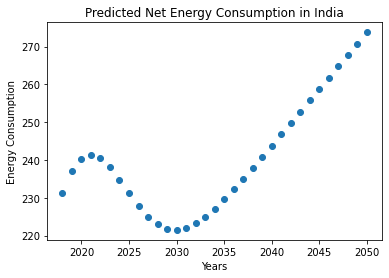

In [418]:
fig, ax = plt.subplots()
ax.scatter(years,net_consumption)
ax.set_title('Predicted Net Energy Consumption in India')
ax.set_xlabel('Years')
ax.set_ylabel('Energy Consumption')


plt.show()

In [419]:
corr, _ = pearsonr(net_consumption, y_pred)
print('Pearsons correlation for Net Energy Consumption with Population in predicted values: %.3f' % corr)

Pearsons correlation for Net Energy Consumption with Population in predicted values: 0.722


In [420]:
# Finding the Rate of Increase for other renewables Consumption
print ("Rate of Increase:", (net_consumption[32] - net_consumption[22])/10)

Rate of Increase: 2.996677418677547
